Yusuf Ciğerci classification


In [ ]:
## Kütüphane import ediyoruk

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, r2_score, roc_auc_score, roc_curve,classification_report



import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

from sklearn import neighbors
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingClassifier

from warnings import filterwarnings

filterwarnings("ignore")
###Uyarı mesajları ekrana yazmasın diye


In [ ]:
### Dataset aktarma kısmı

df = pd.read_csv("/content/fifa_players.csv")

In [ ]:
### Dataset inceleme

df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [ ]:
### Kafa atma kabiliyeti olanlardan kaç tane farklı çeşit var

df["heading_accuracy"].value_counts()

58    650
60    570
55    552
59    551
62    518
     ... 
4       2
6       2
92      2
88      1
94      1
Name: heading_accuracy, Length: 91, dtype: int64

In [ ]:
### data set kaça kaç

df.shape

(17954, 51)

Burda aklıma bir deney yapmak geldi hangi sütünların daha etkili olduğunu benmi daha iyi anlayacağım yoksa yapay zekamı ben aklımı kullandım ve kafa atma gücünün boy ve kiloyla bağdaştırdım aşağıdaki kod benim düşüncem için

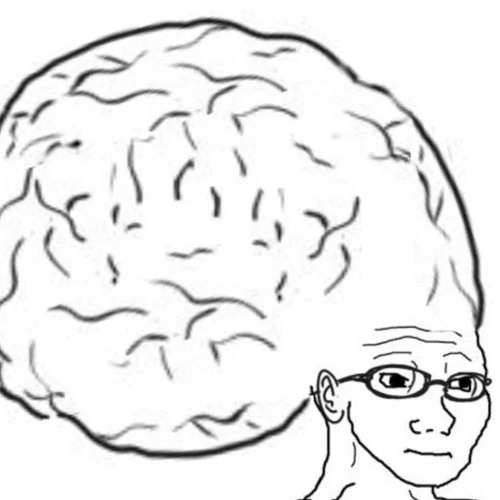

In [ ]:
### bu 3 değişkeni kullanmaya karar verdim

### bağımısız değişken boy ve kilo

### bağımlı değişken zıplama gücü

yc = df[["height_cm", "weight_kgs", "heading_accuracy"]]

In [ ]:
yc.describe().T

kafa_çıkarılmış = yc.drop(["heading_accuracy"],axis=1)
kafa = yc["heading_accuracy"]

In [ ]:
log_model =LogisticRegression(solver="liblinear").fit(kafa_çıkarılmış,kafa)

In [ ]:
log_model.intercept_

array([-3.18185590e-01, -3.84470825e-01, -3.27225306e-01, -5.50184076e-01,
       -2.35358986e+00, -2.80824016e+00, -8.86533403e+00, -9.41161235e+00,
       -9.95694505e+00, -1.03905957e+01, -1.01874821e+01, -8.91777834e+00,
       -7.30303376e+00, -5.58127666e+00, -6.58481240e+00, -5.91935787e+00,
       -5.93214283e+00, -1.47721260e+00, -1.37678982e+00, -2.24542802e+00,
       -1.57404490e+00, -1.08730935e+00, -4.33253411e-01,  4.09366251e-01,
       -2.21248547e-04, -2.02777802e-01,  1.13248544e+00,  7.32266842e-02,
        1.41454117e+00,  1.47353470e+00,  9.62025394e-01,  1.83653761e+00,
        1.65318566e+00,  1.64963178e+00,  2.71572834e+00,  3.08685956e+00,
        3.27537997e+00,  3.30673485e+00,  3.34281450e+00,  3.61601019e+00,
        2.84546573e+00,  2.92808276e+00,  2.98858249e+00,  3.17706377e+00,
        2.51921255e+00,  3.14383708e+00,  1.77876624e+00,  1.95951094e+00,
        1.86609112e+00,  2.37823060e-02,  6.73759304e-01,  1.40986992e+00,
        4.63081247e-05, -

In [ ]:
log_model.coef_

In [ ]:
### ilk deneme

#kafa_tahmin=log_model.predict(kafa_çıkarılmış)
#comparison=pd.DataFrame(log_model.predict(kafa_çıkarılmış)[0:10],columns=["Tahmin"])
#comparison["Gerçek"] = kafa
#comparison

     #Sanırım Over fitting :/

In [ ]:
kafa_tahmin=log_model.predict(kafa_çıkarılmış)
comparison=pd.DataFrame(log_model.predict(kafa_çıkarılmış)[0:50],columns=["Tahmin"])
comparison["Gerçek"] = kafa
comparison

In [ ]:
accuracy_score(kafa,kafa_tahmin)

0.04567227358805837

In [ ]:
print(classification_report(kafa,kafa_tahmin))

In [ ]:
log_model.predict_proba(kafa_çıkarılmış)[0:10]

In [ ]:
kafaç_train,kafaç_test,kafa_train,kafa_test = train_test_split(kafa_çıkarılmış,kafa,test_size=0.20,random_state=42)
log_model =LogisticRegression(solver="liblinear").fit(kafaç_train,kafa_train)

kafa_tahmin= log_model.predict(kafaç_test)

In [ ]:
accuracy_score(kafa_tahmin,kafa_test)

0.042884990253411304

1

Benim tahminler yanlış peki ya makine nasıl yapcak

1

In [ ]:
#df = df.drop("name", axis=1)
#df = df.drop("full_name", axis=1)
#df = df.drop("birth_date", axis=1)
#df = df.drop("positions", axis=1)
#df = df.drop("nationality", axis=1)

#baktım tek tek olmuyor bir kod buldum


In [ ]:
string_columns = df.select_dtypes(include=['object']).columns
string_columns
#Tüm string değerleri gösteriyor

Index([], dtype='object')

In [ ]:
#df = df.drop("preferred_foot", axis=1)
#df = df.drop("body_type", axis=1)
#df = df.drop("national_team", axis=1)
#df = df.drop("national_team_position", axis=1)

In [ ]:
df_t = df.dropna(axis=0)

In [ ]:
df.describe().T

X = df.drop(["heading_accuracy"],axis=1)
y = df["heading_accuracy"]

In [ ]:
X = X.dropna(axis=0)
# X te boşluklar olduğunu söyledi bende sildim HAWLi

In [ ]:
X = X[:len(y)]
# Birşeyler çıkardığım için boylar eşit değil dedi bende yukardaki kodu buldum ve kullandım

In [ ]:
log_model =LogisticRegression(solver="liblinear").fit(X,y)

ValueError: Found input variables with inconsistent numbers of samples: [789, 17954]

In [ ]:
X


,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,94,94,110500000.0,565000.0,5,4,4,...,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,88,89,69500000.0,205000.0,3,5,4,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,5,...,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,88,88,62000000.0,165000.0,3,4,4,...,84,34,26,83,87,61,83,51,24,22
4,27,187.96,88.9,88,91,60000000.0,135000.0,3,3,2,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,67,70,975000.0,3000.0,1,3,3,...,54,69,41,60,64,63,56,40,20,18
17950,23,182.88,79.8,59,67,190000.0,1000.0,1,3,2,...,22,62,55,42,39,32,52,53,64,60
17951,22,185.42,89.8,59,67,170000.0,1000.0,1,1,1,...,9,27,10,5,25,16,47,9,12,13
17952,21,175.26,64.9,59,71,280000.0,4000.0,1,4,3,...,58,38,15,54,52,50,53,16,18,17


Pes ettim hataları anlayamıyorum

Ama üstte zaten bir tane yapmıştım :/